# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

## Dataset Description 

#### <font color='green'>Dataset coulmns : </font>
 
tmdb_5000_movies.csv : 

 budget , genres , homepage , id , keywords , original_language , original_title , overview , popularity , production_companies , production_countries , release_date , revenue , runtime , spoken_languages , status , tagline , title , vote_average , vote_count

tmdb_5000_credits.csv :  movie_id , title , cast , crew


tmdb_5000_credits have basic informations about the movies while tmdb_5000_movies have more advance informations 


### Question(s) for Analysis

Does genres have a significant impact on cost?  
Does the revenue of the movie has a relationship with the releasing year?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [2]:
top_5000_movies = pd.read_csv('tmdb_5000_movies.csv')
top_5000_credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
top_5000_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
top_5000_credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [5]:
# exploring data type for all columns
top_5000_movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [6]:
# exploring data type for all columns
top_5000_credits.dtypes


movie_id     int64
title       object
cast        object
crew        object
dtype: object

In [7]:
# exploring nan value for all columns

print(top_5000_movies.isna().sum())
top_5000_movies.isna().sum()/top_5000_movies.shape[0]*100

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


budget                   0.000000
genres                   0.000000
homepage                64.355611
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
overview                 0.062461
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.020820
revenue                  0.000000
runtime                  0.041641
spoken_languages         0.000000
status                   0.000000
tagline                 17.572351
title                    0.000000
vote_average             0.000000
vote_count               0.000000
dtype: float64

In [8]:
#drop homepage cuse it have 64% nan value 
top_5000_movies.drop('homepage',axis=1,inplace=True)

In [9]:
# replace nan value with static value for overview column
top_5000_movies['overview'].fillna( 'this overview not available ',inplace=True)

In [10]:
# replace nan value with static value for tagline column
top_5000_movies['tagline'].fillna( 'this tagline not available ',inplace=True)

In [11]:
# fill nan value with mean for runtime column
top_5000_movies['runtime'].replace({np.NaN:top_5000_movies['runtime'].mean()},inplace=True)

In [12]:
# drop nan value on release_date 
top_5000_movies['release_date']=top_5000_movies['release_date'].dropna()


In [13]:
#change data type for release_date to datetime64
top_5000_movies['release_date']=top_5000_movies['release_date'].astype('datetime64[ns]')

In [14]:
# exploring nan value for all columns
print(top_5000_credits.isna().sum())
top_5000_credits.isna().sum()/top_5000_credits.shape[0]*100

movie_id    0
title       0
cast        0
crew        0
dtype: int64


movie_id    0.0
title       0.0
cast        0.0
crew        0.0
dtype: float64

In [15]:
### merging both dataframes to make the process easier 
top_5000_full_data =pd.merge(top_5000_credits ,top_5000_movies,on='title', how='outer')


In [16]:
#chick data type for merged data
top_5000_full_data.dtypes

movie_id                         int64
title                           object
cast                            object
crew                            object
budget                           int64
genres                          object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
vote_average                   float64
vote_count                       int64
dtype: object

In [17]:
# drop nan value on release date column
top_5000_full_data.dropna(subset=['release_date'], inplace=True)

In [18]:
#chick if there is any nan value
top_5000_full_data.isna().sum()

movie_id                0
title                   0
cast                    0
crew                    0
budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
vote_average            0
vote_count              0
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [19]:
# I realize this id and title column exist twice we alrady dealt with title and now with id
# Drop the 'movie_id' column
top_5000_full_data.drop(columns=['id'], inplace=True)


In [20]:
# explore if there any duplicate 
top_5000_full_data.duplicated().sum()

0

In [21]:
# there is multy columns contain data as json we should extract the data we need from it 
# 
# converts that string into the corresponding Python object
json_columns = ["cast", "crew", "genres", "spoken_languages","keywords","production_companies",	"production_countries"]
for column in json_columns:
    top_5000_full_data[column] = top_5000_full_data[column].apply(json.loads)

In [22]:
# extract data from json type
top_5000_full_data["cast"] = top_5000_full_data["cast"].apply(lambda x: ', '.join([cast_member['character'] for cast_member in x]))
top_5000_full_data["crew"] = top_5000_full_data["crew"].apply(lambda x: ', '.join([crew_member['job'] for crew_member in x]))

def extract_json_data(df,columns):
    for column in columns:
        df[column]=df[column].apply(lambda x: ', '.join([genre['name'] for genre in x]))


columns = [ "genres", "spoken_languages","keywords","production_companies",	"production_countries"]
extract_json_data(top_5000_full_data,columns)



In [23]:
# Remove rows with zero values in budget and revenue columns
top_5000_full_data = top_5000_full_data[top_5000_full_data['budget'] != 0.000000e+00]
top_5000_full_data = top_5000_full_data[top_5000_full_data['revenue'] != 0.000000e+00]


In [24]:
top_5000_full_data.describe()

,movie_id,budget,popularity,release_date,revenue,runtime,vote_average,vote_count
count,3232.000000,3.232000e+03,3232.000000,3232,3.232000e+03,3232.000000,3232.000000,3232.000000
mean,44762.848082,4.064456e+07,29.042226,2002-03-21 11:08:19.009900928,1.213047e+08,110.736077,6.309592,977.757116
min,5.000000,1.000000e+00,0.019984,1916-09-04 00:00:00,5.000000e+00,41.000000,0.000000,0.000000
25%,4949.250000,1.050000e+07,10.468206,1998-09-10 18:00:00,1.700000e+07,96.000000,5.800000,178.000000
50%,11446.500000,2.500000e+07,20.421905,2005-07-20 12:00:00,5.522308e+07,107.000000,6.300000,471.000000
75%,45283.250000,5.500000e+07,37.361390,2010-11-13 12:00:00,1.463434e+08,121.000000,6.900000,1148.000000
max,417859.000000,3.800000e+08,875.581305,2016-09-09 00:00:00,2.787965e+09,338.000000,8.500000,13752.000000
std,74584.017685,4.437934e+07,36.150742,NaN,1.862899e+08,20.959688,0.873614,1413.888142


In [25]:
#replace zeros on runtime with mod 
runtime_mode = top_5000_full_data['runtime'].mode()[0]  

top_5000_full_data['runtime'].replace(0, runtime_mode, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Does genres have a significant impact on cost?  )

In [26]:
# make new df from origin one contain only genres and budget
genres_budget = top_5000_full_data[['genres', 'budget']].copy()

# split genres cuse cell may contain multy types
genres_budget['genres'] = genres_budget['genres'].apply(lambda x: x.split(','))

genres_budget = genres_budget.explode('genres')

genres_budget

,genres,budget
0,Action,237000000
0,Adventure,237000000
0,Fantasy,237000000
0,Science Fiction,237000000
1,Adventure,300000000
...,...,...
4802,Drama,7000
4802,Thriller,7000
4804,Action,220000
4804,Crime,220000


In [27]:
# calculate avg budget for each genre (mean)
genre_avg_budget = genres_budget.groupby('genres')['budget'].mean()

df_genre_avg_budget = genre_avg_budget.reset_index()
df_genre_avg_budget.columns = ['Genre', 'Average Budget']

df_genre_avg_budget = df_genre_avg_budget[df_genre_avg_budget['Genre'] != ''] # was an empty row so decide to drop it
df_genre_avg_budget = df_genre_avg_budget.sort_values(by='Average Budget', ascending=False)


df_genre_avg_budget

,Genre,Average Budget
22,Animation,8.268113e+07
9,Fantasy,8.007533e+07
3,Animation,7.876392e+07
2,Adventure,7.798003e+07
21,Adventure,7.536576e+07
1,Action,6.971678e+07
8,Family,6.898391e+07
16,Science Fiction,6.354957e+07
28,Fantasy,6.346212e+07
27,Family,6.185526e+07


<Axes: xlabel='genres'>

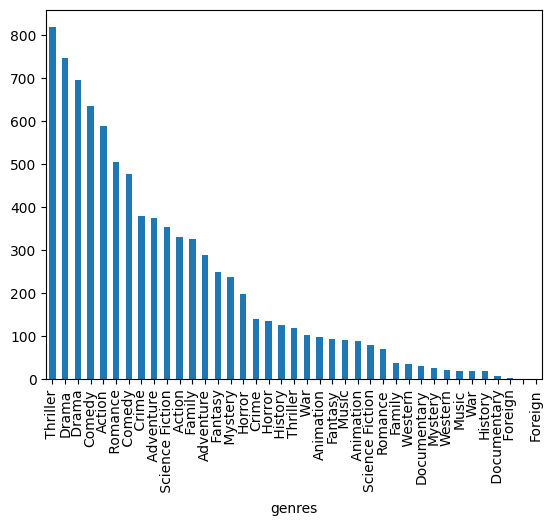

In [28]:
# 1d analyses
genres_budget['genres'].value_counts().plot(kind='bar')

the previous plot show number of times each genre is repeated

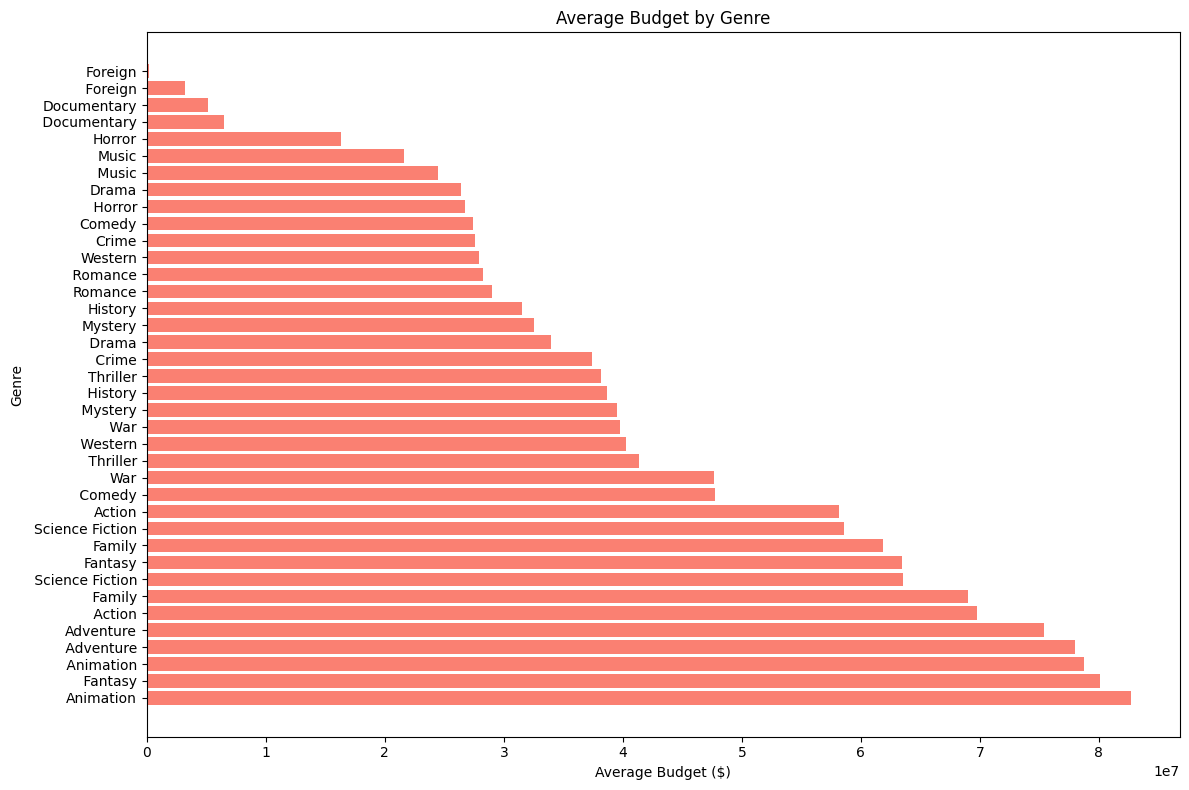

In [29]:
# 2d analyses
plt.figure(figsize=(12, 8))
plt.barh(df_genre_avg_budget['Genre'], df_genre_avg_budget['Average Budget'], color='salmon')
plt.xlabel('Average Budget ($)')
plt.ylabel('Genre')
plt.title('Average Budget by Genre')
plt.tight_layout()
plt.show()

the previous plot show avg budget for each genre

### Research Question 2  (Does the budget of the movie has a relationship with the releasing year? )

In [30]:
# extract revenue and date
budget_year = top_5000_full_data[[ 'revenue' , 'release_date']].copy()
# extract only year
budget_year['release_date'] = budget_year['release_date'].dt.year
budget_year

,revenue,release_date
0,2787965087,2009
1,961000000,2007
2,880674609,2015
3,1084939099,2012
4,284139100,2012
...,...,...
4779,3151130,1994
4794,6000000,1972
4798,99000,1997
4802,424760,2004


In [31]:
# make datafram from  budget_year contain each year and total revenue and number of movies on that year and avg revenue (revenue/no.movies )
summary_df = budget_year.groupby('release_date').agg(
    total_revenue=pd.NamedAgg(column='revenue', aggfunc='sum'),
    number_of_movies=pd.NamedAgg(column='release_date', aggfunc='size')
).reset_index()
summary_df['avg_revenue']=summary_df['total_revenue']/summary_df['number_of_movies']
summary_df

,release_date,total_revenue,number_of_movies,avg_revenue
0,1916,8394751,1,8.394751e+06
1,1925,22000000,1,2.200000e+07
2,1927,650422,1,6.504220e+05
3,1929,4358000,1,4.358000e+06
4,1930,8000000,1,8.000000e+06
...,...,...,...,...
84,2012,23774442705,137,1.735361e+08
85,2013,23208957123,153,1.516925e+08
86,2014,24047236072,135,1.781277e+08
87,2015,22477341942,121,1.857632e+08


<Axes: ylabel='Frequency'>

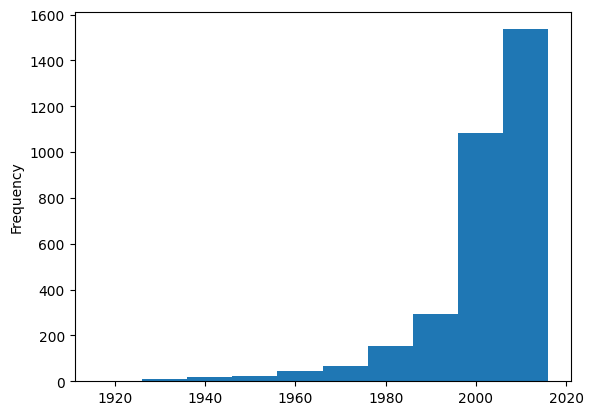

In [32]:
# 1d analyses
budget_year['release_date'].plot(kind='hist')

from previous plot found that most data we have are released after 1990


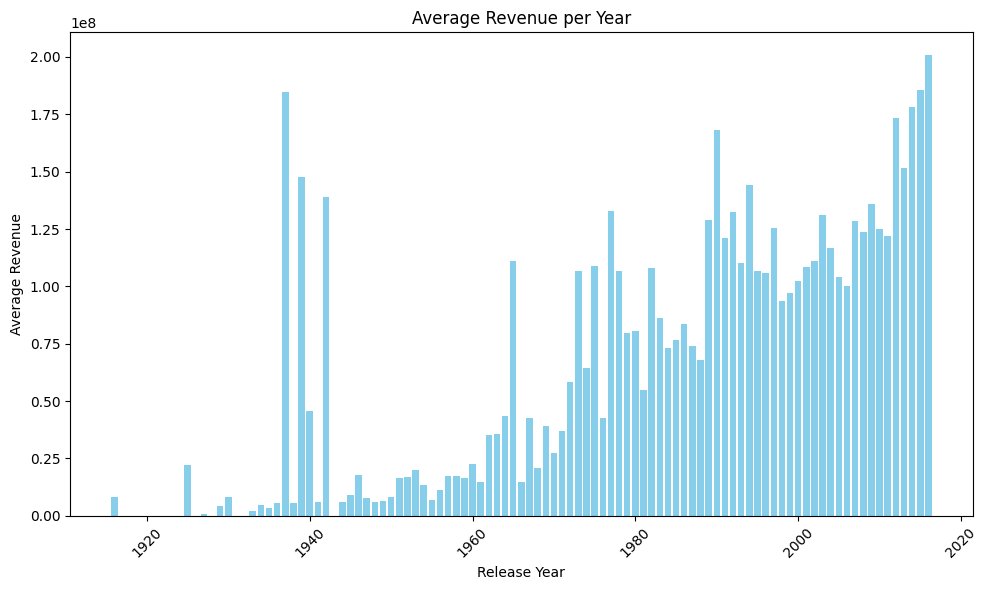

In [33]:
# 2d analyses

plt.figure(figsize=(10, 6))
plt.bar(summary_df['release_date'], summary_df['avg_revenue'], color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue')
plt.title('Average Revenue per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from previous plot    found a possitive relation between release_date and revenue and we found that on 1938 - 1942 have high avg revenue compared to the data around it.

<a id='conclusions'></a>
## Conclusions

Regarding the first question, by found each genre and got avg of budget on there movies  we found that some genre cost more than others sometimes, for example Top 3 genre was Animation , Fantasy and Adventure there cost was near ( 7.5 - 8 )hundred of millions while Drama ,History and Romance was near (3.5 - 4) hundred of millions . 
One of the problems we faced that the data not up to date it may be change with time.
and the data Not big enough the more, the more accurate.

Regarding the second question, by found avg revenue for all movies released on each year we  found a possitive relation between release_date and revenue and we found that on 1938 - 1942 have high avg revenue compared to the data around it.

## Limitation

Revenue Calculation: The revenue figures provided in the dataset might not account for all sources of revenue, such as merchandising, streaming rights, or international box office sales. This could lead to an underestimation of the true revenue generated by a movie and affect the analysis of revenue trends over time.

Just because there's a connection between when a movie comes out and how much money it makes doesn't mean that when it's released directly causes how much it earns. Other things, like how much it's advertised, other movies coming out at the same time, or big events happening around that time, can also affect how much money a movie makes.


In [34]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 536255 bytes to Investigate_a_Dataset.html
